In [2]:
# Brazil-Elections-Twitter-Sentiment

# Twitter Sentiment Analysis using Sklearn (Under Review)

# Description:
#- Program that collects data from Twitter API and classify it into sentiment categories based on positive and negative Amazon reviews
# Model Type 
### Sklearn - GridSearchCV, Decision Tree Classifier, Linear Regression, Naive Bayes, Logistic Regression, 
#20/10/2022

# Version - V1.2

# Goals:
#- To build a ML model that is able to predict the sentiment from twitter hashtags, posts and profiles

# Key Insights and Notes
#- The model is analyzing a "sentiment", which is subjective
#- Repeated tweets can be affecting the performance, you decide if you want to keep them  
 
# Fixes
#- Translation to Portuguese Added :)


# Version Updates:
#- API connections
#- Classify by hashtags
#- Sklearn implemented 
#- Amazon reviews database
#- Save the model 
#- Statistics
#- Added sentiment database
#- Comparisons added 
#- Language translation added
#- Remove duplicates 


# Future Implementations: 
#- Plot Analytical charts 
#- Add start_time and end_time parameters
#- Create a list with market symbol and their sentiment
#- Add time period analysis(select period option)
#- Create sentiment dictionaries from web studies 
#- Hyperparameters Optimization 
#- Train and test with the Brazilian dataset
#- Test with other ML models 
#- Test with ensemble model
#- Analyse use of prepositions 
#- Create a Market Checker were it indicates the sentiment on the period and Prints the Chart Bullish or Bearish 

# Author - Luiz Gabriel Bongiolo

# Credits & References 
#- https://developer.twitter.com/en/docs/tutorials/five-ways-to-convert-a-json-object-to-csv
#- https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets
#- Computer Science youtube channel - https://www.youtube.com/watch?v=ujId4ipkBio&t=280s
#- Keith Galli - https://www.youtube.com/watch?v=M9Itm95JzL0
#- http://jmcauley.ucsd.edu/data/amazon/
#- Daniel Ellis Research - https://towardsdatascience.com/language-translation-using-python-bd8020772ccc

In [3]:
#Import Libraries 

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import os


In [4]:
#Data Class

import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
        

In [5]:
import json

file_name = './Twitter Sentiment Analysis/ML Sentiment Analysis/data/sentiment/Books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
reviews[5].text

'I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia\'s trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character\'s voice on a strong subject and making it so that other peoples story may be heard through Mia\'s.'

In [6]:
#Prepare the data

from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

train_container = ReviewContainer(training)

test_container = ReviewContainer(test)

In [7]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

436
436


In [8]:
#Words vectorization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great !
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

This was an excellent book about multiple personality and what bullying can lead to!  The writer was talented and descriptive and kept the reader wanting to know what would happen next.  I would like to see more by this author.
[[0. 0. 0. ... 0. 0. 0.]]


In [9]:
#Prepare the ensanble model 

#Classification

from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

In [11]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)

clf_gnb.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

In [12]:
#Losgistic Regression

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])


array(['NEGATIVE'], dtype='<U8')

In [13]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))
print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors, test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8076923076923077
0.6586538461538461
0.6322115384615384
0.8052884615384616


In [14]:
# F1 Scores
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])
#f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])




array([0.80582524, 0.80952381])

In [15]:
test_set = ['very fun', "bad book do not buy", 'horrible waste of time']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)


array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

In [16]:
#Tuning the model with Grid Search

from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [17]:
print(clf.score(test_x_vectors, test_y))

0.8100961538461539


In [18]:
#Save the model 

import pickle

with open('./Twitter Sentiment Analysis/ML Sentiment Analysis/models/sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [19]:
#Load the model 

with open('./Twitter Sentiment Analysis/ML Sentiment Analysis/models/sentiment_classifier.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

In [20]:
print(test_x[0])

loaded_clf.predict(test_x_vectors[0])

It was a good book . The story and the characters came together nicely and the ending was awesome .


array(['NEGATIVE'], dtype='<U8')

In [21]:
#from sklearn.linear_model import Perceptron

#clf = Perceptron(tol=1e-3, random_state=0)
#clf.fit(X, y)  

In [215]:
#Load the Twitter Key

import os
os.chdir("./Twitter Sentiment Analysis/")

log = pd.read_csv("ApiKey.csv")



In [216]:
#Get the twitter API credentials 

consumerKey = log["Key"][0]
consumerSecret = log["Key"][1]
accessToken = log["Key"][2]
accessTokenSecret = log["Key"][3]

In [217]:
#Create the authentication object 

authenticate = tweepy.OAuth1UserHandler(consumerKey, consumerSecret)

#Set the access token and acces token secret

authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [218]:
# Extract 1000 tweets from hashtags

keywords = "#Bolsonaro"
keywords2 = "#Lula"
limit=1000

posts = tweepy.Cursor(api.search_tweets, q=keywords, count=100, tweet_mode="extended").items(limit)
posts2 = tweepy.Cursor(api.search_tweets, q=keywords2, count=100, tweet_mode="extended").items(limit)



In [219]:
#Create a dataframe with a column called Tweets

df = pd.DataFrame([tweet.full_text for tweet in posts], columns=["Tweets"])

df2 = pd.DataFrame([tweet.full_text for tweet in posts2], columns=["Tweets"])

df2

,Tweets
0,@77_frota Fora Bozo e os filhos do Bozo. E #L...
1,RT @zehdeabreu: MEU DEUS MINAS GERAIS!!!!!\n❤️...
2,RT @willames_vieira: 🚨🚨 AGORA CAMINHADA LULA P...
3,"RT @gudryanneufert: Perguntei, agora pouco, ao..."
4,RT @anjulitostes: Sem medo de ser feliz! Lula ...
...,...
995,RT @zehdeabreu: MEU DEUS MINAS GERAIS!!!!!\n❤️...
996,RT @wdiaspi: Maranhão e Piauí unidos por democ...
997,RT @wdiaspi: Maranhão e Piauí unidos por democ...
998,RT @zehdeabreu: MEU DEUS MINAS GERAIS!!!!!\n❤️...


In [220]:
#Clean the text 
#Create a function to clean the tweets 

def cleanTxt(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) #Removing @mentions 
    text = re.sub(r"#", "", text) #Removing #hashtags
    text = re.sub(r"RT[\s]+", "", text) #Removing RT
    text = re.sub(r"https?:\/\/\S+", "", text) #Removing hyperlink

    return text 

df["Tweets"] = df["Tweets"].apply(cleanTxt)

#Clean df2

def cleanTxt(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) #Removing @mentions 
    text = re.sub(r"#", "", text) #Removing @mentions 
    text = re.sub(r"RT[\s]+", "", text) #Removing RT
    text = re.sub(r"https?:\/\/\S+", "", text) #Removing hyperlink

    return text 

df2["Tweets"] = df2["Tweets"].apply(cleanTxt)


#Show the cleaned text 
df2

,Tweets
0,_frota Fora Bozo e os filhos do Bozo. E Lula 13
1,: MEU DEUS MINAS GERAIS!!!!!\n❤️❤️❤️❤️\n\nNing...
2,_vieira: 🚨🚨 AGORA CAMINHADA LULA PRESIDENTE 13...
3,": Perguntei, agora pouco, ao candidato, Luis I..."
4,: Sem medo de ser feliz! Lula lá!! ❤️\n\nLula ...
...,...
995,: MEU DEUS MINAS GERAIS!!!!!\n❤️❤️❤️❤️\n\nNing...
996,": Maranhão e Piauí unidos por democracia, espe..."
997,": Maranhão e Piauí unidos por democracia, espe..."
998,: MEU DEUS MINAS GERAIS!!!!!\n❤️❤️❤️❤️\n\nNing...


In [221]:
#If you want to remove Duplicated tweets uncomment this 

#df = df.drop_duplicates()
#df= df2.drop_duplicates()

#df2

In [222]:
#Translating tweets to english :)

import translators as ts




df['Tweets'] = df['Tweets'].apply(lambda x: ts.google(x, from_language='pt', to_language='en'))
df2['Tweets'] = df2['Tweets'].apply(lambda x: ts.google(x, from_language='pt', to_language='en'))


In [223]:
df

,Tweets
0,: 🔮 Prediction 23: Brazilian election 🗳 \n\n W...
1,: We will be today in Balneário Camboriú and C...
2,_: Already! Gusttavo Lima and you on Superlive...
3,Thanks Bolsonaro Bolsonaro reelected in 2022
4,: I'm with Jair again! It's 2️⃣2️⃣! \n Bolsona...
...,...
995,"_: I am not asking, but share this video with ..."
996,And when will it be from Marcola and the CCP w...
997,Lulanacadeia ptnuncais bolsonaroreeleitom2022 ...
998,SuperLiveBolsonaro Superlivecombolsonaro Super...


In [224]:
test_set2 = df["Tweets"]
new_test2 = vectorizer.transform(test_set2)

clf_svm.predict(new_test2)



prediction = pd.DataFrame(clf_svm.predict(new_test2), columns=["Prediction"])


df["Prediction"] = prediction

df

,Tweets,Prediction
0,: 🔮 Prediction 23: Brazilian election 🗳 \n\n W...,POSITIVE
1,: We will be today in Balneário Camboriú and C...,POSITIVE
2,_: Already! Gusttavo Lima and you on Superlive...,NEGATIVE
3,Thanks Bolsonaro Bolsonaro reelected in 2022,POSITIVE
4,: I'm with Jair again! It's 2️⃣2️⃣! \n Bolsona...,NEGATIVE
...,...,...
995,"_: I am not asking, but share this video with ...",NEGATIVE
996,And when will it be from Marcola and the CCP w...,POSITIVE
997,Lulanacadeia ptnuncais bolsonaroreeleitom2022 ...,POSITIVE
998,SuperLiveBolsonaro Superlivecombolsonaro Super...,POSITIVE


In [225]:
#Text second #

test_set3 = df2["Tweets"]
new_test3 = vectorizer.transform(test_set3)

clf_svm.predict(new_test3)



prediction2 = pd.DataFrame(clf_svm.predict(new_test3), columns=["Prediction2"])


df2["Prediction2"] = prediction2

df2


,Tweets,Prediction2
0,_Frota outside Bozo and the children of Bozo. ...,POSITIVE
1,: MY GOD MINAS GENERAL !!!!! \n ❤️❤️❤️❤️ \n\n ...,NEGATIVE
2,_Vieira: 🚨🚨 Now walk Lula President 13 \n\n Ar...,POSITIVE
3,": I asked, now little, to the candidate, Luis ...",POSITIVE
4,: Without fear of being happy! Lula there !! ❤...,POSITIVE
...,...,...
995,: MY GOD MINAS GENERAL !!!!! \n ❤️❤️❤️❤️ \n\n ...,NEGATIVE
996,": Maranhão and Piauí united for democracy, hop...",POSITIVE
997,": Maranhão and Piauí united for democracy, hop...",POSITIVE
998,: MY GOD MINAS GENERAL !!!!! \n ❤️❤️❤️❤️ \n\n ...,NEGATIVE


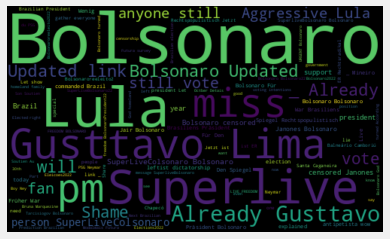

In [226]:
#Check the distribution of the polarity with Word Cloud

allWords = " ".join( [twts for twts in df["Tweets"]])
wordCloud = WordCloud(width = 500, height=300, random_state = 42, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")

plt.axis("off")
plt.show()

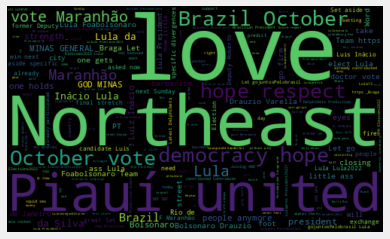

In [227]:
#Check the distribution of the polarity with Word Cloud

allWords2 = " ".join( [twts for twts in df2["Tweets"]])
wordCloud2 = WordCloud(width = 500, height=300, random_state = 42, max_font_size = 119).generate(allWords2)

plt.imshow(wordCloud2, interpolation = "bilinear")

plt.axis("off")
plt.show()

In [228]:
#Count values df1

df["Prediction"].value_counts()

POSITIVE    619
NEGATIVE    381
Name: Prediction, dtype: int64

In [229]:
#Describe df1

df["Prediction"].describe()

count         1000
unique           2
top       POSITIVE
freq           619
Name: Prediction, dtype: object

In [230]:
#Show only positive from df1

df[df["Prediction"]=="POSITIVE"]

,Tweets,Prediction
0,: 🔮 Prediction 23: Brazilian election 🗳 \n\n W...,POSITIVE
1,: We will be today in Balneário Camboriú and C...,POSITIVE
3,Thanks Bolsonaro Bolsonaro reelected in 2022,POSITIVE
5,"_: We need you, Patriot! 🇧🇷 \n\n Be a campaign...",POSITIVE
6,Calid path is one that will lead the PT to pow...,POSITIVE
...,...,...
994,: URGENT: Bolsonaro turned! \n\n According to ...,POSITIVE
996,And when will it be from Marcola and the CCP w...,POSITIVE
997,Lulanacadeia ptnuncais bolsonaroreeleitom2022 ...,POSITIVE
998,SuperLiveBolsonaro Superlivecombolsonaro Super...,POSITIVE


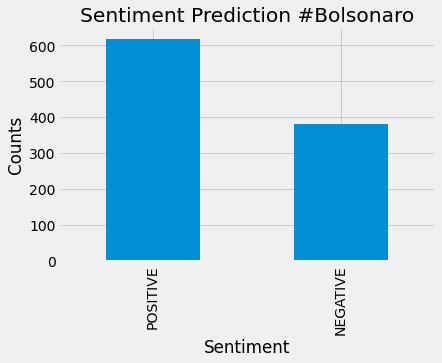

In [231]:
#So lets only with the ML model 

#Show the value counts 

df["Prediction"].value_counts()

#plot

plt.title("Sentiment Prediction " + str(keywords))
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Prediction"].value_counts().plot(kind="bar")
plt.show()

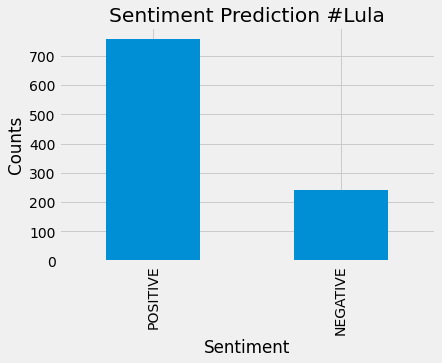

In [232]:
#Show the value counts 

df2["Prediction2"].value_counts()

#plot

plt.title("Sentiment Prediction " + str(keywords2))
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df2["Prediction2"].value_counts().plot(kind="bar")
plt.show()

In [233]:
#Percentage of Positive tweets 

ptweets = df[df.Prediction == "POSITIVE"] 
ptweets = ptweets["Tweets"]
ptweets = (len(ptweets) / len(df)) * 100

ntweets = df[df.Prediction == "NEGATIVE"] 
ntweets = ntweets["Tweets"]
ntweets = (len(ntweets) / len(df)) * 100

ptweets2 = df2[df2.Prediction2 == "POSITIVE"] 
ptweets2 = ptweets2["Tweets"]
ptweets2 = (len(ptweets2) / len(df2)) * 100

ntweets2 = df2[df2.Prediction2 == "NEGATIVE"] 
ntweets2 = ntweets2["Tweets"]
ntweets2 = (len(ntweets2) / len(df2)) * 100



print(str(keywords))
print("Positive " + str(ptweets)+ "%")
print("Negative "+ str(ntweets) + "%")
print("####################")
print(str(keywords2))
print("Positive " + str(ptweets2)+ "%")
print("Negative "+ str(ntweets2) + "%")
print("####################")

#Bolsonaro
Positive 61.9%
Negative 38.1%
####################
#Lula
Positive 75.9%
Negative 24.099999999999998%
####################
